### Week 12: ADS

In [1]:
import folium

In [2]:
#!pip install folium

In [3]:
m = folium.Map()

In [4]:
m

In [5]:
import pandas as pd

In [17]:
death_us = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [18]:
death_us.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,39,39,41,42,42,42,42,42,42,42
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,84,84,98,98,98,98,98,98,137,137
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,10,10,10,10,10,10,11,11,11,29
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,17,17,17,17,17,17,17,18,38
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,36,36,39,40,40,40,40,40,40,43


In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/12-02-2020.csv')

In [57]:
m = folium.Map(location=[df.iloc[0]['Lat'], df.iloc[0]['Long_']],
              zoom_start=6, tiles = 'StamenToner')

In [60]:
for i in range(10):
    county = death_us.loc[i, 'Admin2']
    deaths = death_us.loc[i, '12/2/20']
    folium.CircleMarker(location = [death_us.iloc[i]['Lat'], death_us.iloc[i]['Long_']], radius = int(deaths),
                  popup = f'<strong>County:</strong> {county}\nDeaths: {deaths}', fill = 'crimson').add_to(m)

In [61]:
m

In [67]:
from folium.plugins import HeatMap

In [83]:
m = folium.Map(location=[df.iloc[0]['Lat'], df.iloc[0]['Long_']],
              zoom_start=6, tiles = 'StamenToner')

In [84]:
h = HeatMap(data=death_us.loc[:, ['Lat', 'Long_', '12/2/20']], max_zoom = 26)

In [85]:
h.add_to(m)

In [86]:
m

### Distributions

In [87]:
import matplotlib.pyplot as plt

In [88]:
import scipy.stats as stats

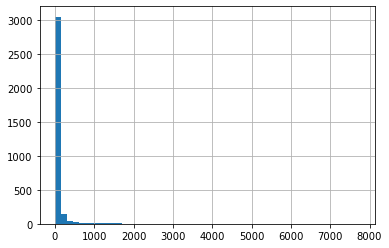

In [90]:
death_us['12/2/20'].hist(bins = 50)

In [93]:
yesterdays_totals = death_us[['12/2/20']]

In [107]:
yesterdays_totals.shape

(3340, 1)

In [110]:
sample_means = []
for i in range(10000):
    sample_means.append(yesterdays_totals.sample(100).mean()[0])

(array([1.726e+03, 4.300e+03, 2.206e+03, 1.059e+03, 4.730e+02, 1.610e+02,
        5.300e+01, 1.600e+01, 2.000e+00, 4.000e+00]),
 array([ 21.44 ,  51.486,  81.532, 111.578, 141.624, 171.67 , 201.716,
        231.762, 261.808, 291.854, 321.9  ]),
 <a list of 10 Patch objects>)

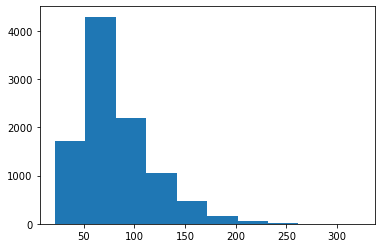

In [111]:
plt.hist(sample_means)

In [112]:
d1 = stats.norm(10, 2)

In [113]:
samples = d1.rvs(1000)

(array([  1.,  11.,  37., 123., 248., 305., 185.,  69.,  15.,   6.]),
 array([ 2.60050667,  4.0055283 ,  5.41054993,  6.81557156,  8.22059319,
         9.62561482, 11.03063645, 12.43565808, 13.84067971, 15.24570134,
        16.65072297]),
 <a list of 10 Patch objects>)

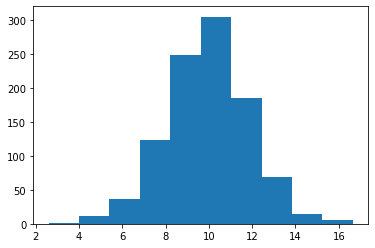

In [114]:
plt.hist(samples)

In [140]:
import numpy as np
d1 = stats.norm(10, 2)
x = np.linspace(2, 17, 1000)
smooth = d1.pdf(x)

cumulative = d1.cdf(x)

In [144]:
d1.cdf(8)

0.15865525393145707

In [145]:
d1.pdf(8)

0.12098536225957168

Text(0.5, 1.0, 'Cumulative Distribution')

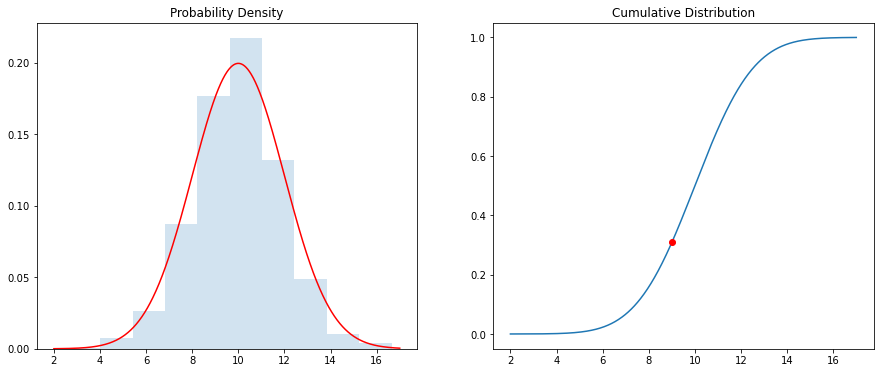

In [146]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax[0].plot(x, smooth, color = 'red')
ax[0].hist(samples, alpha = 0.2, density = True);
ax[0].set_title('Probability Density')
ax[1].plot(x, cumulative)
ax[1].plot(9, d1.cdf(9), 'ro')
ax[1].set_title('Cumulative Distribution')

In [130]:
#Probability that the sum of die greater than 8?
dice = [1, 2, 3, 4, 5, 6]
roll_dict = {i:0 for i in range(2, 13)}
count = 0
for i in range(10_000):
    roll = np.random.choice(dice) + np.random.choice(dice)
    roll_dict[roll] += 1
# print(count/10_000)

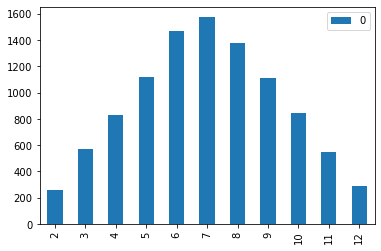

In [139]:
pd.DataFrame(roll_dict.values(), index = range(2, 13)).plot(kind = 'bar')

In [125]:
roll_dict

{2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

In [ ]:
d2 = stats.binom()


In [91]:
death_us.nlargest(5, '12/2/20')

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20
213,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,7446,7497,7543,7580,7604,7623,7639,7655,7700,7740
1923,84036047,US,USA,840,36047.0,Kings,New York,US,40.636182,-73.949356,...,7485,7489,7493,7495,7498,7502,7505,7507,7509,7510
1941,84036081,US,USA,840,36081.0,Queens,New York,US,40.710881,-73.816847,...,7341,7343,7347,7349,7353,7354,7354,7355,7356,7363
640,84017031,US,USA,840,17031.0,Cook,Illinois,US,41.841448,-87.816588,...,6339,6389,6414,6450,6476,6568,6595,6669,6695,6768
1902,84036005,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,...,5035,5030,5030,5027,5028,5027,5026,5024,5024,5024
